<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/Copy_of_black_scholes_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Black-Scholes** --- Calculation price, greeks and implied volatility

*Reconciliation reference:*

*https://goodcalculators.com/black-scholes-calculator/*

*https://www.math.drexel.edu/~pg/fin/VanillaCalculator.html*

In [25]:
# Import packages
import numpy as np
from scipy.stats import norm

Black-Scholes analytical price

In [26]:
# Black-Scholes analytical function

def black_scholes_analytical(s_0, k, T, r, q, sigma, option_type):
  d1 = (np.log(s_0/k) + (r-q+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
  d2 = (np.log(s_0/k) + (r-q-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
  if option_type == 'call':
    val = np.exp(-q*T)*s_0*norm.cdf(d1,0,1) - k*np.exp(-r*T)*norm.cdf(d2,0,1)
  elif option_type == 'put':
    val = k*np.exp(-r*T)*norm.cdf(-d2,0,1) - s_0*np.exp(-q*T)*norm.cdf(-d1,0,1)
  return val

Black-Scholes class object for prices and greeks

In [27]:
# class objecct to price and determine greeks

class bs_object(object):
  """Black-Scholes model to provide present value and greeks for given inputs"""

  def __init__(self, s_0, k, T, r, q, sigma, option_type):
    self.s_0 = s_0
    self.k = k
    self.T = T
    self.r = r
    self.q = q
    self.sigma = sigma 
    self.option_type = option_type
    self.d1 = (np.log(self.s_0/self.k) + (self.r-self.q+0.5*self.sigma**2)*self.T) / (self.sigma*np.sqrt(self.T))
    self.d2 = (np.log(self.s_0/self.k) + (self.r-self.q-0.5*self.sigma**2)*self.T) / (self.sigma*np.sqrt(self.T))

  def val(self):
    if self.option_type == 'call':
      val = np.exp(-self.q*self.T)*self.s_0*norm.cdf(self.d1,0,1) - self.k*np.exp(-self.r*self.T)*norm.cdf(self.d2,0,1)
    elif self.option_type == 'put':
      val = self.k*np.exp(-self.r*self.T)*norm.cdf(-self.d2,0,1) - self.s_0 * np.exp(-self.q*self.T)*norm.cdf(-self.d1,0,1)
    return val

  def delta(self):
    if self.option_type == 'call':
      delta = np.exp(-self.q*self.T)*norm.cdf(self.d1,0,1)
    elif self.option_type == 'put':
      delta = -np.exp(-self.q*self.T)*norm.cdf(-self.d1,0,1)
    return delta 

  def vega(self):
    vega = self.s_0*np.exp(-self.q*self.T)*np.sqrt(self.T)*norm.pdf(self.d1)
    return vega / 100

  def theta(self):
    if self.option_type == 'call':
      theta = (-np.exp(-self.q*self.T)*self.s_0*norm.pdf(self.d1)*self.sigma/(2*np.sqrt(self.T)) 
               - self.r*self.k*np.exp(-self.r*self.T)*norm.cdf(self.d2,0,1)
               + self.q*self.s_0*np.exp(-self.q*self.T)*norm.cdf(self.d1,0,1) 
               )
    elif self.option_type == 'put':
      theta = (-np.exp(-self.q*self.T)*self.s_0*norm.pdf(-self.d1)*self.sigma/(2*np.sqrt(self.T))
               + self.r*self.k*np.exp(-self.r*self.T)*norm.cdf(-self.d2,0,1) 
               - self.q*self.s_0*np.exp(-self.q*self.T)*norm.cdf(-self.d1,0,1) 
               )
    return theta

  def rho(self):
    if self.option_type == 'call':
      rho = self.k*self.T*np.exp(-self.r*self.T)*norm.cdf(self.d2,0,1)
    elif self.option_type == 'put':
      rho = -self.k*self.T*np.exp(-self.r*self.T)*norm.cdf(-self.d2,0,1)
    return rho / 100   

  def gamma(self):
    gamma = np.exp(-self.q*self.T)*norm.pdf(self.d1) / (self.s_0*self.sigma*np.sqrt(self.T))
    return gamma

In [28]:
# Review class
# help(bs_object)

Run Black-Scholes analytical pricer and class object

In [29]:
# Calculate black_scholes_analytical and bs_object

# Inputs
s_0_val = 102
k_val = 105
r_val = 0.05
q_val = 0.02
sigma_val = 0.15
T_val =  2
option_type_val = 'call'    # or 'put'
decimals = 3

# input collation for bs_object
trade_1 = bs_object(s_0_val, k_val, T_val, 
               r_val, q_val, sigma_val, option_type_val)

print('black_scholes_analytical=', round(
    black_scholes_analytical(s_0_val, k_val, T_val, r_val, q_val, 
                             sigma_val, option_type_val), decimals), '\n')

print('Results from bs_object:')
print('d1=', round(trade_1.d1, decimals))
print('d2=', round(trade_1.d2, decimals)) 
print('Val=', round(trade_1.val(), decimals)) 
print('Delta=', round(trade_1.delta(), decimals)) 
print('Vega=', round(trade_1.vega(), decimals)) 
print('Theta=', round(trade_1.theta(), decimals)) 
print('Rho=', round(trade_1.rho(), decimals)) 
print('Gamma=', round(trade_1.gamma(), decimals))

black_scholes_analytical= 9.735 

Results from bs_object:
d1= 0.252
d2= 0.04
Val= 9.735
Delta= 0.576
Vega= 0.536
Theta= -3.285
Rho= 0.98
Gamma= 0.017


Calculate implied volatility from option prices: 
i) Naive brute force approach
ii) Newton-Raphson

---



In [30]:
# Calculate implied volatility from option price
# Method is naive using brute force and finding nearest 
# For better results use Newton-Raphson 

def imp_vol(pv, s_0, k, r, q, T, option_type, epsilon, max_sigma, inc_sigma):
  sigma_array = np.linspace(inc_sigma_val,max_sigma_val, int(max_sigma_val/inc_sigma_val))
  pv_iter_array = []
  abs_diff_array = []
  for sigma in sigma_array:
    pv_iter = black_scholes_analytical(s_0, k, T, r, q, sigma, option_type)
    pv_iter_array.append(pv_iter)
    abs_diff = abs(pv - pv_iter)
    abs_diff_array.append(abs_diff)
  where_vol_diff_min = np.where(abs_diff_array == np.amin(abs_diff_array))[0][0]
  return sigma_array[where_vol_diff_min]

In [31]:
# Run imp_vol calculations

pv_val = 9.7
s_0_val = 102
k_val = 105
r_val = 0.05
q_val = 0.02
T_val =  2
option_type_val = 'call'    # or 'put'
epsilon_val = 2
max_sigma_val = 1
inc_sigma_val = 0.001
decimals = 4

round(imp_vol(pv_val, s_0_val, k_val, r_val, q_val, T_val, option_type_val, epsilon_val, max_sigma_val, inc_sigma_val), decimals)

0.149

In [32]:
# Estimate implied volatility using Newton-Raphson
def newtonRaphson( pv_target, s_0, k, T, r, q, sigma, option_type, accuracy ): 
    h = ( (bs_object(s_0, k, T, r, q, sigma, option_type).val() - pv_target) 
    / bs_object(s_0, k, T, r, q, sigma, option_type).vega() )
    while abs(h) >= accuracy:
      h = ( (bs_object(s_0, k, T, r, q, sigma, option_type).val() - pv_target) 
      / bs_object(s_0, k, T, r, q, sigma, option_type).vega() )
      sigma = sigma - h / 100
    return sigma 

In [33]:
# Newton-Raphson to estimate implied volatility

# Inputs
pv_target_val = 12
s_0_val = 102
k_val = 105
r_val = 0.05
q_val = 0.02
sigma_val = 0.05    # estimate implied volatility to begin
T_val =  2
option_type_val = 'call'    # or 'put'
accuracy_val = 0.01
decimals = 5

# Estimate implied vol
imp_vol_est = newtonRaphson(pv_target_val, s_0_val, k_val, T_val, r_val, q_val, sigma_val, option_type_val, accuracy_val)

# Test
pv_for_imp_vol_est = bs_object(s_0_val, k_val, T_val, r_val, q_val, imp_vol_est, option_type_val).val()
print('Estimated implied volatility for pv_target_val=', pv_target_val, 'is', round(imp_vol_est, decimals))
print('Compare with BS price for implied vol of =', round(imp_vol_est, decimals), 'giving PV of=', round(pv_for_imp_vol_est, decimals))

Estimated implied volatility for pv_target_val= 12 is 0.19227
Compare with BS price for implied vol of = 0.19227 giving PV of= 12.0


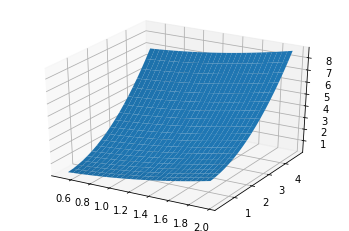

In [34]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')

K = np.arange(0.5, 2.0, 0.05)
# X = [50, -4, -3, -2, -1, 0, 1, 2, 3]
T = np.arange(0.25, 5, 0.25)

K, T = np.meshgrid(K, T)
Vol = 0.5*K**2 + 0.3*T**2 

surf = ax.plot_surface(K, T, Vol)




In [177]:

import io
import ftplib
import pandas
import requests
#import requests_html
import ssl
import numpy as np
from yahoo_fin import options
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import py_vollib.black_scholes as vol
import yfinance as yf


tickers = ["aapl", "nflx"]

dow_data = {}
for ticker in tickers:
    try:
        dow_data[ticker] = options.get_options_chain(ticker)
    except Exception:
        print(ticker + " failed")

#print(dow_data["aapl"]["calls"].keys())

for ticker in tickers:
    iv_dec = []
    calls = dow_data[ticker]['calls']
    volatility = calls["Implied Volatility"]
    for ii in range(len(volatility)):
        x = volatility[ii]
        dec = float(x.strip('%').replace(',',''))/100
        iv_dec.append(dec)
        
    dow_data[ticker]['calls']["iv_dec"] = iv_dec


strike = dow_data["nflx"]['calls']["Strike"]
iv = dow_data["nflx"]['calls']["iv_dec"]

dow_data.head(3)
#calls
#print(strike)

# https://github.com/luke-truitt/ralph-usa/blob/6b3ded77f99bf150f385b7486ed27bf4bfd5e305/algDev/preprocessing/smile.py

AttributeError: ignored

In [40]:
!pip install -q yfinance
!pip install -q yahoo_fin
!pip install -q py_vollib
!pip install -q requests_html
!pip install -q yahooquery

In [172]:
vol_time_slice_dict=options.get_options_chain('tsla', date=expiration_set[6])

vol_time_slice = pd.concat([vol_time_slice_dict['calls'], vol_time_slice_dict['puts']])

df_final =vol_time_slice[vol_time_slice['Last Price'] !=0]


expiration_set=options.get_expiration_dates('tsla')


today = datetime.datetime(int(2020), int(6), int(17))
this_expiration = datetime.datetime(expiration_set[6])
this_tenor = this_expiration - today



print(expiration)
options.get_calls('tsla', date=expiration_set[6]).head()

TypeError: ignored

In [168]:
new_r = df_final.shape[0]
new_col =  np.ones(new_r) * 3
idx=1   
df_final.insert(loc=idx, column='Expiration', value=new_col)
df_final.head()

ValueError: ignored

In [206]:
# Import libraries
import io
import ftplib
import pandas
import requests
import ssl
import numpy as np
from yahoo_fin import options
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import py_vollib.black_scholes as vol
import yfinance as yf
#import HTMLSession
import datetime

today = datetime.datetime(int(2020), int(6), int(18))

# Import data from yahoo
#import_vol_raw_data = {}

expiration_set=options.get_expiration_dates('tsla')

this_expiration = expiration_set[8]

import_vol_raw_data = options.get_options_chain('tsla', date=expiration_set[8]) # this is dict


For each expiry date do
make combined data from and build in a column with expiry date



#this_tenor = this_expiration - today

import_vol_data = pd.concat([vol_time_slice_dict['calls'], vol_time_slice_dict['puts']])

import_vol_data_clean =import_vol_data[import_vol_data['Last Price'] !=0]

tenor_list = []


#yy=import_vol_data_clean['Contract Name'].strip('TSLA')[0:2]
#mm=import_vol_data_clean['Contract Name'].strip('TSLA')[2:4]
#dd=import_vol_data_clean['Contract Name'].strip('TSLA')[4:6]
#tenor=(datetime.datetime(2000+int(yy), int(mm), int(dd)) - today).days
#tenor_list.append(tenor)

#strike = import_vol_data['tsla']['puts']['Strike']
#vol = import_vol_data['tsla']['puts']['Implied Volatility']
#vol2 = vol / 100
import pandas as pd
#d = {'strike_range':strike, 'tenor_range':tenor,'vol_output': vol}
#df = pd.DataFrame(d)
#type(df['vol_output'][2])

this_expiration

d = datetime.datetime.strptime(this_expiration, '%d %B, %Y')
#print(d.strftime('%Y-%m-%d'))
print(d.strftime('%m-%d-%y'))


ValueError: ignored

Index(['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid',
       'Ask', 'Change', '% Change', 'Volume', 'Open Interest',
       'Implied Volatility'],
      dtype='object')
[ 1.03427287e-05 -8.23317703e-03  1.65247813e+00]


'50.00%'

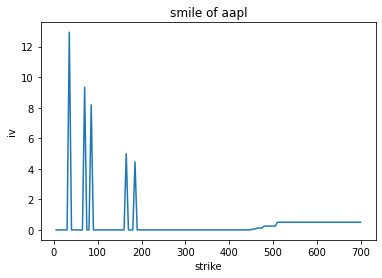

In [43]:
print(d.strftime('%Y-%m-%d'))
import io
import ftplib
import pandas
import requests
#import requests_html
import ssl
import numpy as np
from yahoo_fin import options
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import py_vollib.black_scholes as vol
import yfinance as yf

tickers = ["aapl", "nflx"]

dow_data = {}
for ticker in tickers:
    try:
        dow_data[ticker] = options.get_options_chain(ticker)
    except Exception:
        print(ticker + " failed")

print(dow_data["aapl"]["calls"].keys())

for ticker in tickers:
    iv_dec = []
    calls = dow_data[ticker]['calls']
    volatility = calls["Implied Volatility"]
    for ii in range(len(volatility)):
        x = volatility[ii]
        dec = float(x.strip('%').replace(',',''))/100
        iv_dec.append(dec)
        
    dow_data[ticker]['calls']["iv_dec"] = iv_dec

strike = dow_data["nflx"]['calls']["Strike"]
iv = dow_data["nflx"]['calls']["iv_dec"]

plt.plot(strike, iv) 
plt.xlabel('strike') 
plt.ylabel("iv") 
plt.title('smile of aapl') 

# plt.show() 

poly = np.polyfit(strike, iv, 2) 
print(poly)

x

In [83]:
# https://github.com/dpguthrie/yahooquery